In [1]:
# Load modules for data accessing and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load NLP modules
import re
import sys
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams

In [3]:
# construct dataframe for train...
df_train = pd.read_csv('../../data/dataset/csv/review.csv', index_col = 'review_id')

In [4]:
#####################
## Preprocess data ##
#####################
#token_pattern = "[a-zA-Z'`]+"
token_pattern = "[a-zA-Z0-9'`]+"
#print(stopwords.words('english'))
#token_pattern = r"(?u)\b\w\w+\b"
def TextPreProcessing(line,
                      token_pattern=token_pattern):
    ## tokenize
    tokenizer = RegexpTokenizer(token_pattern)
    tokens = tokenizer.tokenize( str(line).lower() )
    return tokens

def Myngrams(text, nfold):
    s = []
    for ngram in ngrams(text, nfold):
        s.append(' '.join(str(i) for i in ngram))

    #s = list(set(s)) # unique string in the list
    return s

print(Myngrams(TextPreProcessing('This is a token. This is 1 sentence. We are data scientists!', token_pattern), 2))

['this is', 'is a', 'a token', 'token this', 'this is', 'is 1', '1 sentence', 'sentence we', 'we are', 'are data', 'data scientists']


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

def TryDivide(x, y, val=0.0):
    """ 
    Try to divide two numbers
    """
    if y != 0.0:
        val = float(x) / y
    return val

def GetPositionList(tgt, obs):
    """
    Get the list of positions of obs in target
    """
    pos_of_obs_in_tgt = [0]
    if len(obs) != 0:
        pos_of_obs_in_tgt = [j for j,w in enumerate(obs, start=1) if w in tgt]
        if len(pos_of_obs_in_tgt) == 0:
            pos_of_obs_in_tgt = [0]
    #print(pos_of_obs_in_tgt)
    return pos_of_obs_in_tgt

def DumpTextBasicNgram(df):
    ## 1-gram
    print("Generate 1-gram...")
    df["text_1gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 1), axis=1))
    ## 2-gram
    print("Generate 2-gram...")
    df["text_2gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 2), axis=1))
    ## 3-gram
    print("Generate 3-gram...")
    df["text_3gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 3), axis=1))

    return ;
    
def DumpTextCountFeatures(df):
    ################################
    ## text count and digit count ##
    ################################
    print("Generate basic text count features...")
    fnames = ["text"]
    ngrams = ["1gram", "2gram", "3gram"]
    CountDigit = lambda x: sum([1. for w in x if w.isdigit()])
    
    for fname in fnames:
        for ngram in ngrams:
            ## word count
            df["Count_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: len(x[fname + "_" + ngram]), axis=1))
            df["CountUnique_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: len(set(x[fname + "_" + ngram])), axis=1))
            df["RatioUnique_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: TryDivide(x["CountUnique_%s_%s"%(fname, ngram)], x["Count_%s_%s"%(fname, ngram)]), axis=1))
        ## digit count
        df["CountDigit_%s"%fname] = list(df.apply(lambda x: CountDigit(x[fname + "_1gram"]), axis=1))
        df["RatioDigit_%s"%fname] = list(df.apply(lambda x: TryDivide(x["CountDigit_%s"%fname], x["Count_%s_1gram"%(fname)]), axis=1))
    '''
    ## description missing indicator
    #df["description_missing"] = list(df.apply(lambda x: int(x["description_unigram"] == ""), axis=1))
    '''

    df.drop(['text_1gram', 'text_2gram', 'text_3gram'], axis=1, inplace=True)
    
    return

import sklearn.utils
sub_df_train = sklearn.utils.shuffle(df_train).iloc[:50000, :]
DumpTextBasicNgram(sub_df_train)
DumpTextCountFeatures(sub_df_train)
sub_df_train.head()

Generate 1-gram...
Generate 2-gram...


/home/huawei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: generator 'ngrams' raised StopIteration


Generate 3-gram...
Generate basic text count features...


,useful,date,text,stars,business_id,user_id,cool,funny,Count_text_1gram,CountUnique_text_1gram,RatioUnique_text_1gram,Count_text_2gram,CountUnique_text_2gram,RatioUnique_text_2gram,Count_text_3gram,CountUnique_text_3gram,RatioUnique_text_3gram,CountDigit_text,RatioDigit_text
review_id,,,,,,,,,,,,,,,,,,,
S5AcPH2au5r1y5Bdy8x6EQ,2,2013-05-01,Our washing machine died and I assumed it was ...,5,mQnYgd5ywCzYMblWqL7-AQ,avmhn0FqmYmdi0YJJJ5Uow,0,0,101,69,0.683168,100,95,0.950000,99,99,1.00000,0.0,0.000000
Q5bBt15VqmXGcDrifLTO6Q,1,2010-12-22,Please don't go here. I'm begging you. I would...,1,iT9KMTR8NqYwSCW-zMUOxw,VKrXZY_OjTZ1yg7a3HH_4w,0,3,545,289,0.530275,544,510,0.937500,543,537,0.98895,10.0,0.018349
TKGPOoqfYuOBw1Pja3hpHQ,0,2017-10-31,TriTip grilled cheese with tomato soup hot the...,4,svT1TdTgTd4k4-utMCQU8w,orO4O_7InPaJk32SJk2XYA,0,0,20,20,1.000000,19,19,1.000000,18,18,1.00000,0.0,0.000000
afApmHsySJOHZtkZMZNlbg,3,2009-02-14,"2.5 stars. Decent sushi, not as good as Shimog...",3,hDJZh2TD9f-TVEVun75IJg,Svz06Rw7m8SwHHMhovjONA,1,1,154,103,0.668831,153,149,0.973856,152,152,1.00000,5.0,0.032468
Bs_VtM5fky2kDF9E6pIh1Q,3,2014-06-11,Great spot for a music venue. Bar food is not ...,4,CDqPVVvQtVncNQGydnZy7A,xB9d9hlf8D_KuAwK54ZtVg,0,0,91,61,0.670330,90,83,0.922222,89,84,0.94382,0.0,0.000000


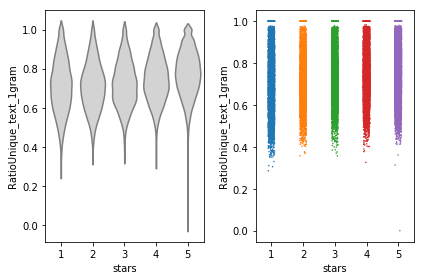

In [10]:
# stars vs 1gram
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='RatioUnique_text_1gram', data=sub_df_train, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='RatioUnique_text_1gram', data=sub_df_train, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

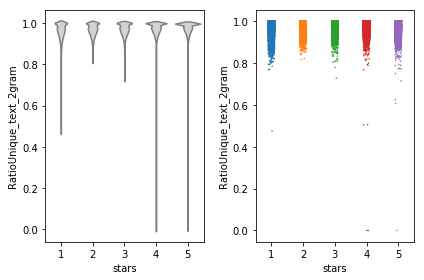

In [11]:
# stars vs 1gram
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='RatioUnique_text_2gram', data=sub_df_train, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='RatioUnique_text_2gram', data=sub_df_train, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

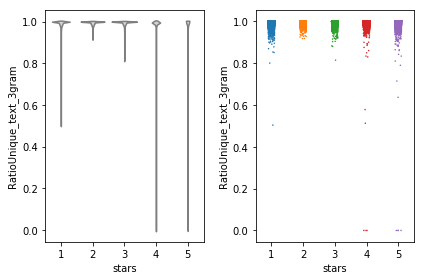

In [12]:
# stars vs 1gram
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='RatioUnique_text_3gram', data=sub_df_train, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='RatioUnique_text_3gram', data=sub_df_train, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()